## Assignment on Prediction of Car Prices - Regression Project ##

### Problem Statement ###

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

* Which variables are significant in predicting the price of a car
* How well those variables describe the price of a car
  Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 
  
 


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
# reading data
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [88]:
#shape of the data
df.shape

(205, 26)

In [89]:
#info the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [90]:
#describe the data
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [91]:
# checking for duplicates
df.duplicated(subset = ['car_ID']).sum()

0

In [92]:
# checking for null values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

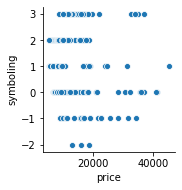

In [93]:
# pairplot for symboling vs price
sns.pairplot(y_vars = 'symboling', x_vars = 'price' ,data = df)

In [94]:
#Column CarName
df['CarName'].value_counts()

toyota corolla              6
peugeot 504                 6
toyota corona               6
subaru dl                   4
toyota mark ii              3
                           ..
mitsubishi pajero           1
subaru r1                   1
alfa-romero Quadrifoglio    1
peugeot 304                 1
audi 100 ls                 1
Name: CarName, Length: 147, dtype: int64

In [95]:
#spliting carname and car company
df['car_company'] = df['CarName'].apply(lambda x:x.split(' ')[0])

In [96]:
#rechecking
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [97]:
#deleting the original column
df = df.drop(['CarName'], axis =1)

In [125]:
#cheking car company 
df['car_company']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: car_company, Length: 205, dtype: object

In [99]:
# replacing names for duplicate values
df['car_company'].replace('toyouta', 'toyota',inplace=True)
df['car_company'].replace('Nissan', 'nissan',inplace=True)
df['car_company'].replace('maxda', 'mazda',inplace=True)
df['car_company'].replace('vokswagen', 'volkswagen',inplace=True)
df['car_company'].replace('vw', 'volkswagen',inplace=True)
df['car_company'].replace('porcshce', 'porsche',inplace=True)

In [100]:
#rechecking the data:
df['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

In [102]:
#doornumber - Number of doors in a car
df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [103]:
# changing format by using functions concept
def number_(x):
    return x.map({'four':4, 'two': 2})
    
df['doornumber'] = df[['doornumber']].apply(number_)

In [104]:
#rechecking
df['doornumber'].value_counts()

4    115
2     90
Name: doornumber, dtype: int64

In [105]:
#cylindernumber- cylinder placed in the car
df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [106]:
# changing format by using functions
def convert_number(x):
    return x.map({'two':2, 'three':3, 'four':4,'five':5, 'six':6,'eight':8,'twelve':12})

df['cylindernumber'] = df[['cylindernumber']].apply(convert_number)

# Data Visualization #

In [108]:
# splitting data into numeric values
cars_numeric = df.select_dtypes(include =['int64','float64'])
cars_numeric.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


<Figure size 2160x2160 with 0 Axes>

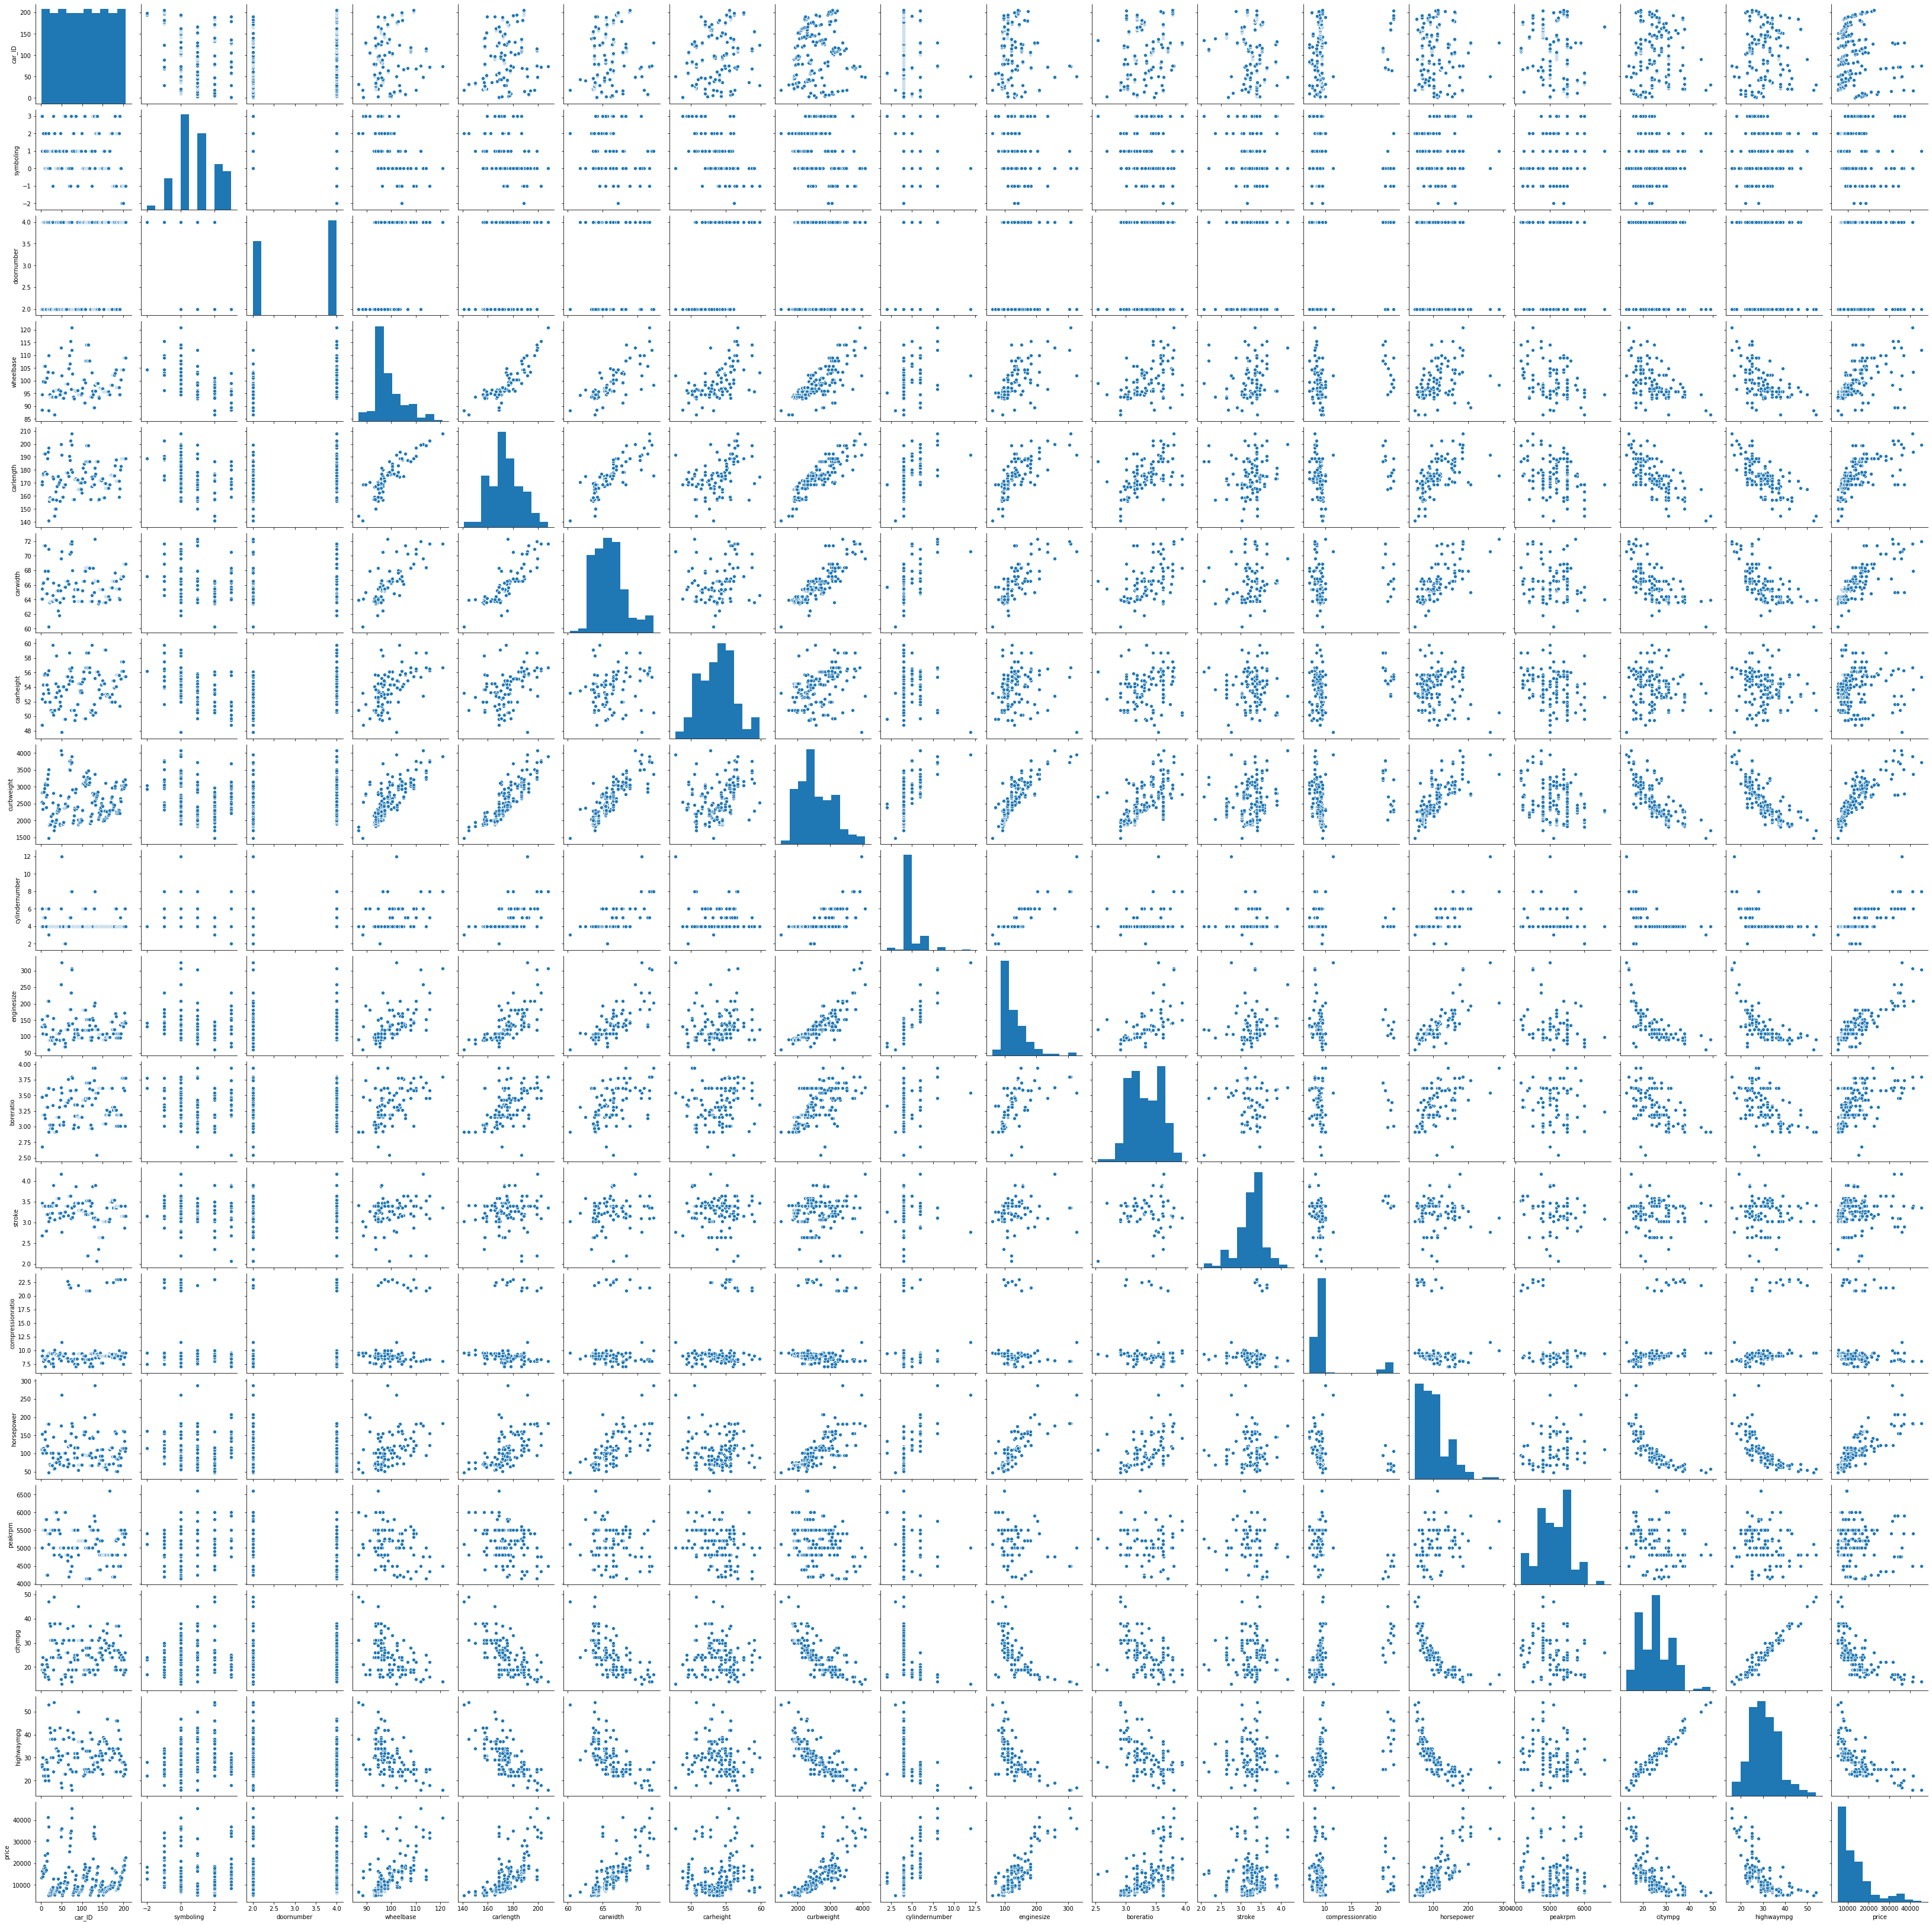

In [27]:
plt.figure(figsize = (30,30))
sns.pairplot(cars_numeric)
plt.show()

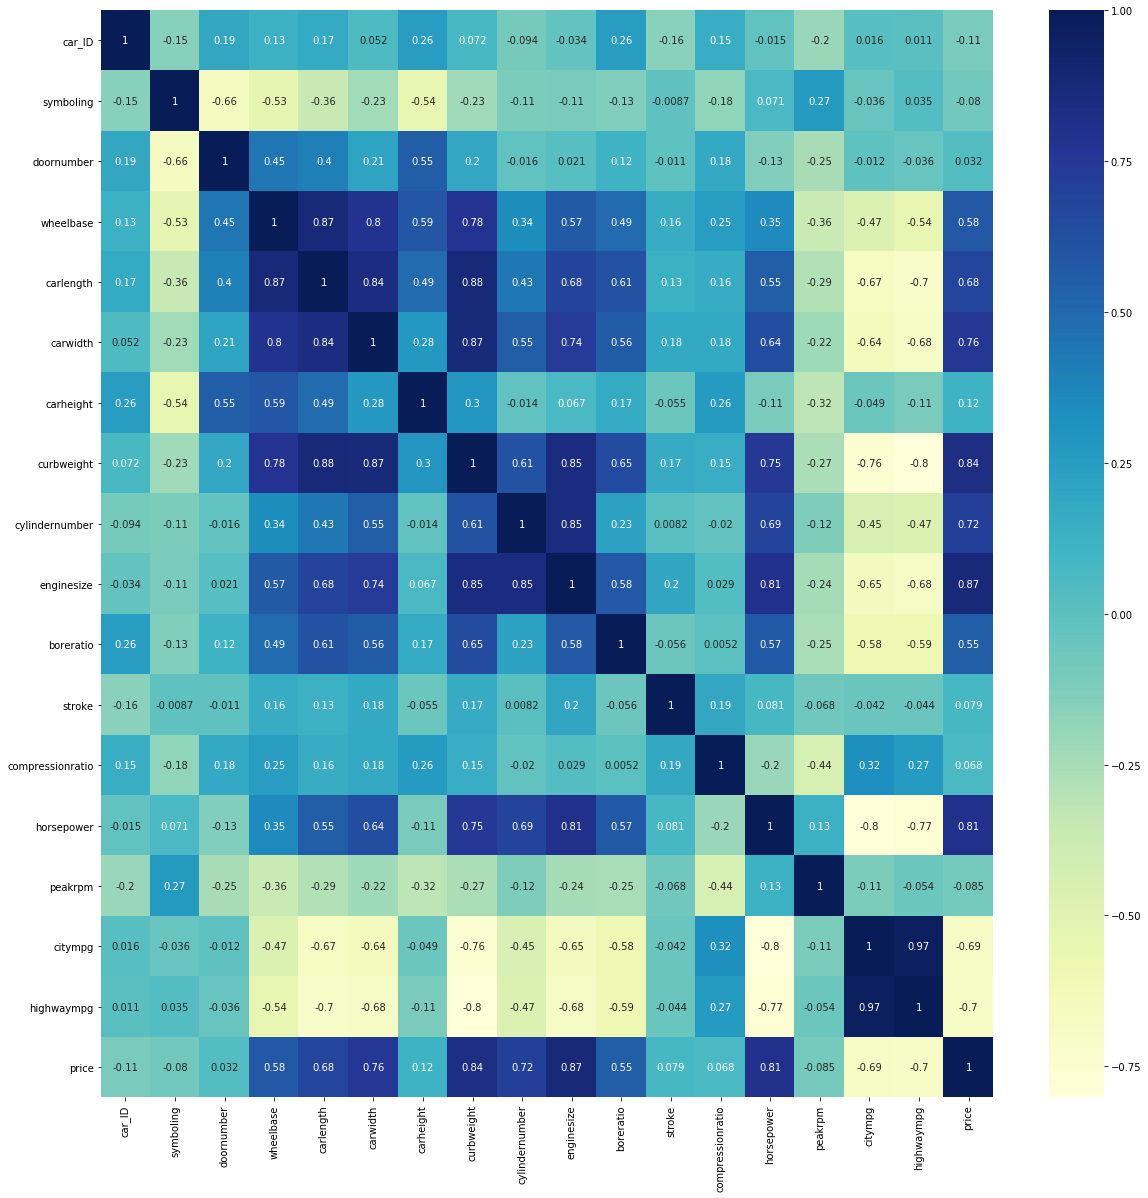

In [28]:
# checking co-relation of variables
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

* carwidth , carlength, curbweight ,enginesize ,horsepowerseems to have a poitive correlation with price.
* carheight doesn't show any significant trend with price.
* citympg , highwaympg - seem to have a significant negative correlation with price.

In [109]:
#spliting data into categorical values
categorical_cols = df.select_dtypes(include = ['object'])
categorical_cols.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,car_company
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi


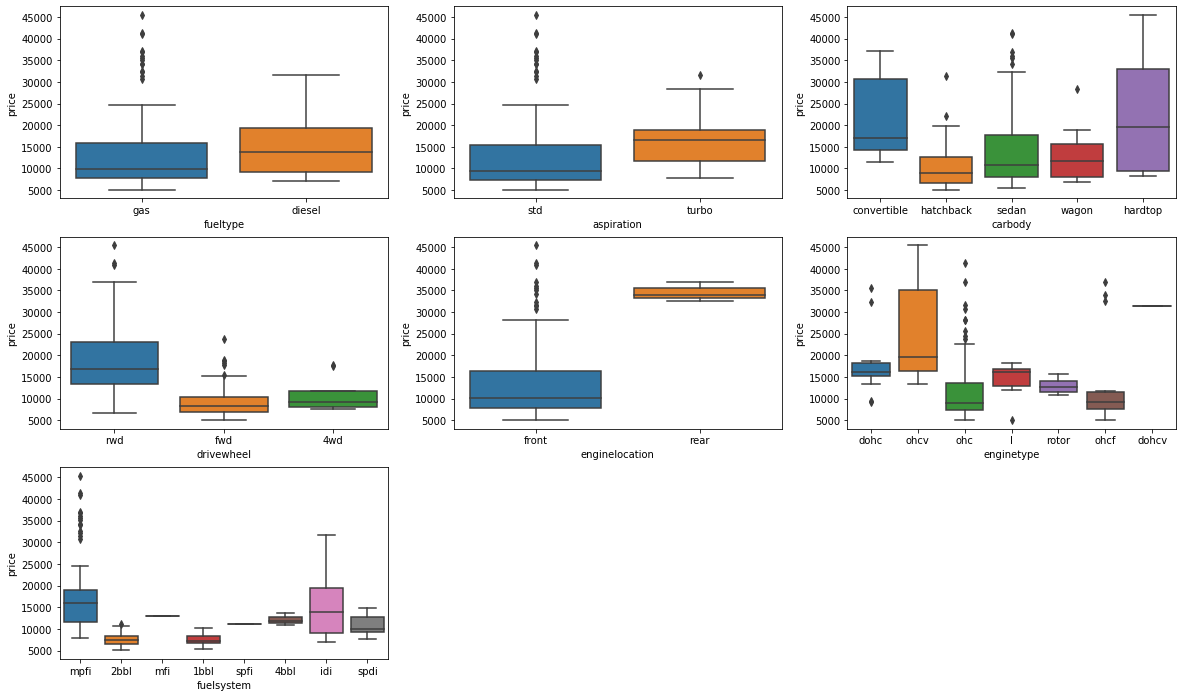

In [110]:
# boxplot for checking outliers
plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)

* The cars with fueltype as diesel are comparatively expensive than the cars with fueltype as gas.
* All the types of carbody is relatively cheaper as compared to convertible carbody.
* The cars with rear enginelocation are way expensive than cars with front enginelocation.
* The price of car is directly proportional to no. of cylinders in most cases.
* Enginetype ohcv comes into higher price range cars.
* DoorNumber isn't affecting the price much.
* HigerEnd cars seems to have rwd drivewheel

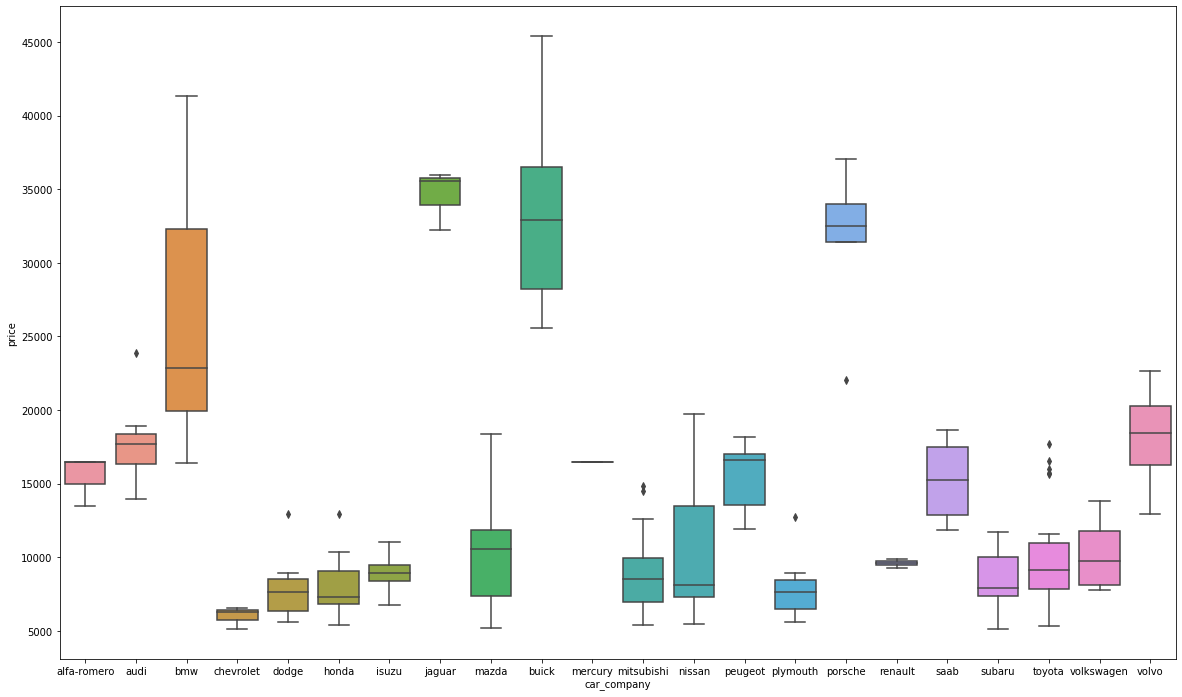

In [111]:
plt.figure(figsize = (20,12))
sns.boxplot(x = 'car_company', y = 'price', data = df)

# Data Prepration #

In [112]:
#creating dummies
cars_dummies = pd.get_dummies(categorical_cols, drop_first = True)
cars_dummies.head()

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
# merging dummys with the original data set
car_df  = pd.concat([df, cars_dummies], axis =1)

In [114]:
car_df = car_df.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsystem', 'car_company'], axis =1)

In [115]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_ID                  205 non-null    int64  
 1   symboling               205 non-null    int64  
 2   doornumber              205 non-null    int64  
 3   wheelbase               205 non-null    float64
 4   carlength               205 non-null    float64
 5   carwidth                205 non-null    float64
 6   carheight               205 non-null    float64
 7   curbweight              205 non-null    int64  
 8   cylindernumber          205 non-null    int64  
 9   enginesize              205 non-null    int64  
 10  boreratio               205 non-null    float64
 11  stroke                  205 non-null    float64
 12  compressionratio        205 non-null    float64
 13  horsepower              205 non-null    int64  
 14  peakrpm                 205 non-null    in

# Building MLR Models #

In [37]:
# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Performing Train and Test  ##

In [38]:
# spliting data
df_train, df_test = train_test_split(car_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [39]:
df_train.shape

(143, 61)

In [40]:
df_test.shape

(62, 61)

In [41]:
cars_numeric.columns

Index(['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price'],
      dtype='object')

In [42]:
col_list = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth','carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
            'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

In [43]:
scaler = StandardScaler()

In [44]:
df_train[col_list] = scaler.fit_transform(df_train[col_list])

In [45]:
df_train.describe()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
count,143.000000,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,98.524476,5.473477e-17,9.006005e-17,1.538785e-15,2.003060e-16,-4.093074e-15,5.450186e-16,-1.894367e-16,-3.726623e-16,-4.308908e-17,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,58.977655,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,1.000000,-2.347020e+00,-1.126872e+00,-2.006930e+00,-2.574223e+00,-2.510760e+00,-2.371619e+00,-1.937401e+00,-2.084351e+00,-1.566427e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.500000,-6.689008e-01,-1.126872e+00,-6.771770e-01,-6.186702e-01,-8.565171e-01,-7.222984e-01,-7.711028e-01,-3.514313e-01,-6.847340e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97.000000,1.701590e-01,8.874120e-01,-3.405307e-01,-1.128552e-01,-1.993522e-01,6.112865e-02,-2.478347e-01,-3.514313e-01,-3.663447e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,147.500000,1.701590e-01,8.874120e-01,4.505882e-01,7.076008e-01,4.804736e-01,7.414732e-01,7.203955e-01,-3.514313e-01,3.928914e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,205.000000,1.848278e+00,8.874120e-01,2.874442e+00,2.324616e+00,2.927846e+00,2.287711e+00,2.812547e+00,6.580247e+00,4.923816e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
y_train = df_train.pop('price')
X_train = df_train

In [47]:
lr = LinearRegression()
lr.fit(X_train,y_train)

# Subsetting training data for 15 selected columns
rfe = RFE(lr,15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [48]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('car_ID', False, 40),
 ('symboling', False, 43),
 ('doornumber', False, 42),
 ('wheelbase', False, 27),
 ('carlength', False, 30),
 ('carwidth', True, 1),
 ('carheight', False, 25),
 ('curbweight', False, 17),
 ('cylindernumber', False, 31),
 ('enginesize', True, 1),
 ('boreratio', False, 18),
 ('stroke', False, 32),
 ('compressionratio', True, 1),
 ('horsepower', False, 22),
 ('peakrpm', False, 23),
 ('citympg', False, 35),
 ('highwaympg', False, 29),
 ('fueltype_gas', True, 1),
 ('aspiration_turbo', False, 16),
 ('carbody_hardtop', False, 14),
 ('carbody_hatchback', False, 12),
 ('carbody_sedan', False, 13),
 ('carbody_wagon', False, 15),
 ('drivewheel_fwd', False, 34),
 ('drivewheel_rwd', False, 37),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 21),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 19),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 38),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_2bbl', False, 26),
 ('fuelsystem_4bbl', False,

In [49]:
cols = X_train.columns[rfe.support_]
cols

Index(['carwidth', 'enginesize', 'compressionratio', 'fueltype_gas',
       'enginelocation_rear', 'enginetype_l', 'enginetype_ohcf',
       'enginetype_rotor', 'fuelsystem_idi', 'car_company_bmw',
       'car_company_mazda', 'car_company_mitsubishi', 'car_company_peugeot',
       'car_company_renault', 'car_company_subaru'],
      dtype='object')

In [50]:
#model 1
X1 = X_train[cols]
X1_sm = sm.add_constant(X1)

lr_1 = sm.OLS(y_train,X1_sm).fit()

In [116]:
lr_1.params

const                     0.477568
carwidth                  0.430374
enginesize                0.479035
compressionratio         -0.450513
fueltype_gas             -0.626931
enginelocation_rear       1.489398
enginetype_l              0.898320
enginetype_ohcf           0.643624
enginetype_rotor          0.953572
fuelsystem_idi            1.104499
car_company_bmw           1.067796
car_company_mazda        -0.243894
car_company_mitsubishi   -0.395607
car_company_peugeot      -1.409776
car_company_renault      -0.677828
car_company_subaru       -0.845775
dtype: float64

In [51]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     114.1
Date:                Fri, 11 Sep 2020   Prob (F-statistic):           4.59e-64
Time:                        14:02:27   Log-Likelihood:                -22.314
No. Observations:                 143   AIC:                             72.63
Df Residuals:                     129   BIC:                             114.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [52]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,enginelocation_rear,inf
6,enginetype_ohcf,inf
14,car_company_subaru,inf
2,compressionratio,42.32
8,fuelsystem_idi,41.28
12,car_company_peugeot,9.73
5,enginetype_l,8.99
3,fueltype_gas,4.60
0,carwidth,3.38
1,enginesize,3.30


In [53]:

lr2 = LinearRegression()

rfe2 = RFE(lr2,10)
rfe2.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [54]:
list(zip(X_train.columns,rfe2.support_,rfe2.ranking_))

[('car_ID', False, 45),
 ('symboling', False, 48),
 ('doornumber', False, 47),
 ('wheelbase', False, 32),
 ('carlength', False, 35),
 ('carwidth', True, 1),
 ('carheight', False, 30),
 ('curbweight', False, 22),
 ('cylindernumber', False, 36),
 ('enginesize', True, 1),
 ('boreratio', False, 23),
 ('stroke', False, 37),
 ('compressionratio', False, 4),
 ('horsepower', False, 27),
 ('peakrpm', False, 28),
 ('citympg', False, 40),
 ('highwaympg', False, 34),
 ('fueltype_gas', False, 3),
 ('aspiration_turbo', False, 21),
 ('carbody_hardtop', False, 19),
 ('carbody_hatchback', False, 17),
 ('carbody_sedan', False, 18),
 ('carbody_wagon', False, 20),
 ('drivewheel_fwd', False, 39),
 ('drivewheel_rwd', False, 42),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 26),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 24),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 43),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_2bbl', False, 31),
 ('fuelsystem_4bbl', Fals

In [55]:
supported_cols = X_train.columns[rfe2.support_]
supported_cols 

Index(['carwidth', 'enginesize', 'enginelocation_rear', 'enginetype_l',
       'enginetype_ohcf', 'enginetype_rotor', 'car_company_bmw',
       'car_company_peugeot', 'car_company_renault', 'car_company_subaru'],
      dtype='object')

In [56]:
#model 2
X2 = X_train[supported_cols]
X2_sm = sm.add_constant(X2)

model_2 = sm.OLS(y_train,X2_sm).fit()

In [117]:
model_2.params

const                 -0.050628
carwidth               0.461050
enginesize             0.480643
enginelocation_rear    1.453811
enginetype_l           0.944955
enginetype_ohcf        0.655263
enginetype_rotor       0.692699
car_company_bmw        1.124652
car_company_peugeot   -1.258166
car_company_renault   -0.625577
car_company_subaru    -0.798549
dtype: float64

In [57]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.3
Date:                Fri, 11 Sep 2020   Prob (F-statistic):           3.98e-64
Time:                        14:03:49   Log-Likelihood:                -33.027
No. Observations:                 143   AIC:                             86.05
Df Residuals:                     133   BIC:                             115.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0506    

In [58]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,enginelocation_rear,inf
4,enginetype_ohcf,inf
9,car_company_subaru,inf
7,car_company_peugeot,10.05
3,enginetype_l,9.49
1,enginesize,3.21
0,carwidth,3.15
5,enginetype_rotor,1.14
6,car_company_bmw,1.09
8,car_company_renault,1.00


In [59]:
#model 3
X3 = X2.drop(['car_company_subaru'], axis =1)
X3_sm = sm.add_constant(X3)

Model_3 = sm.OLS(y_train,X3_sm).fit()

In [119]:
Model_3.params

const                 -0.050628
carwidth               0.461050
enginesize             0.480643
enginelocation_rear    2.252360
enginetype_l           0.944955
enginetype_ohcf       -0.143286
enginetype_rotor       0.692699
car_company_bmw        1.124652
car_company_peugeot   -1.258166
car_company_renault   -0.625577
dtype: float64

In [60]:
print(Model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.3
Date:                Fri, 11 Sep 2020   Prob (F-statistic):           3.98e-64
Time:                        14:04:13   Log-Likelihood:                -33.027
No. Observations:                 143   AIC:                             86.05
Df Residuals:                     133   BIC:                             115.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0506    

In [61]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
7,car_company_peugeot,10.05
3,enginetype_l,9.49
1,enginesize,3.21
0,carwidth,3.15
2,enginelocation_rear,1.19
5,enginetype_rotor,1.14
4,enginetype_ohcf,1.11
6,car_company_bmw,1.09
8,car_company_renault,1.00


In [62]:
#model 4
X4 = X3.drop(['enginetype_ohcf'], axis =1)
X4_sm = sm.add_constant(X4)

Model_4 = sm.OLS(y_train,X4_sm).fit()

In [120]:
Model_4.params

const                 -0.063532
carwidth               0.459583
enginesize             0.486993
enginelocation_rear    2.110683
enginetype_l           0.964122
enginetype_rotor       0.713668
car_company_bmw        1.131164
car_company_peugeot   -1.264726
car_company_renault   -0.613296
dtype: float64

In [63]:
print(Model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     160.8
Date:                Fri, 11 Sep 2020   Prob (F-statistic):           8.22e-65
Time:                        14:04:38   Log-Likelihood:                -34.105
No. Observations:                 143   AIC:                             86.21
Df Residuals:                     134   BIC:                             112.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0635    

In [64]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
6,car_company_peugeot,10.05
3,enginetype_l,9.49
1,enginesize,3.19
0,carwidth,3.15
4,enginetype_rotor,1.14
2,enginelocation_rear,1.09
5,car_company_bmw,1.09
7,car_company_renault,1.00


In [65]:
#model 5
X5 = X4.drop(['car_company_peugeot'], axis =1)
X5_sm = sm.add_constant(X5)

Model_5 = sm.OLS(y_train,X5_sm).fit()

In [121]:
Model_5.params

const                 -0.066277
carwidth               0.411492
enginesize             0.510147
enginelocation_rear    2.055971
enginetype_l          -0.123809
enginetype_rotor       0.743113
car_company_bmw        1.126941
car_company_renault   -0.599065
dtype: float64

In [66]:
print(Model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     167.5
Date:                Fri, 11 Sep 2020   Prob (F-statistic):           2.49e-63
Time:                        14:05:00   Log-Likelihood:                -40.550
No. Observations:                 143   AIC:                             97.10
Df Residuals:                     135   BIC:                             120.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0663    

In [67]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X5.columns
vif['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,enginesize,3.13
0,carwidth,2.89
4,enginetype_rotor,1.13
2,enginelocation_rear,1.09
5,car_company_bmw,1.09
3,enginetype_l,1.08
6,car_company_renault,1.00


In [68]:
#model 6
X6 = X5.drop(['enginetype_l'], axis =1)
X6_sm = sm.add_constant(X6)

Model_6 = sm.OLS(y_train,X6_sm).fit()

In [122]:
Model_6.params

const                 -0.074817
carwidth               0.397808
enginesize             0.520439
enginelocation_rear    2.041898
enginetype_rotor       0.764008
car_company_bmw        1.129441
car_company_renault   -0.587897
dtype: float64

In [69]:
print(Model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     195.2
Date:                Fri, 11 Sep 2020   Prob (F-statistic):           2.92e-64
Time:                        14:05:22   Log-Likelihood:                -41.121
No. Observations:                 143   AIC:                             96.24
Df Residuals:                     136   BIC:                             117.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0748    

In [70]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X6.columns
vif['VIF'] = [variance_inflation_factor(X6.values, i) for i in range(X6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,enginesize,3.01
0,carwidth,2.68
3,enginetype_rotor,1.13
4,car_company_bmw,1.09
2,enginelocation_rear,1.08
5,car_company_renault,1.00


## Residual analysis ##

In [71]:
y_train_pred = Model_6.predict(X6_sm)
y_train_pred.head()

122   -0.786206
125    0.700670
166   -0.750148
1     -0.324235
199    0.234674
dtype: float64

In [72]:
Residual = y_train- y_train_pred

### Checking error terms distribution ###

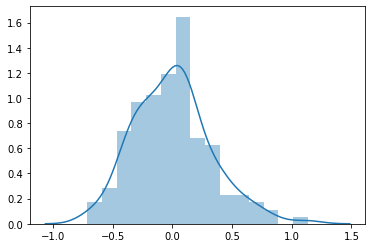

In [73]:
sns.distplot(Residual, bins =15)

In [74]:
df_test[col_list] = scaler.transform(df_test[col_list])

In [75]:
y_test = df_test.pop('price')
X_test = df_test

In [76]:
final_cols = X6.columns

In [77]:
X_test_model6= X_test[final_cols]
X_test_model6.head()

,carwidth,enginesize,enginelocation_rear,enginetype_rotor,car_company_bmw,car_company_renault
160,-0.652569,-0.660242,0,0,0,0
186,-0.154030,-0.390836,0,0,0,0
59,0.299187,-0.072447,0,0,0,0
165,-0.833856,-0.660242,0,0,0,0
140,-0.924500,-0.415328,0,0,0,0


In [78]:
X_test_sm = sm.add_constant(X_test_model6)

In [79]:
y_pred = Model_6.predict(X_test_sm)

In [80]:
y_pred.head()

160   -0.678030
186   -0.339498
59     0.006498
165   -0.750148
140   -0.658743
dtype: float64

Text(0, 0.5, 'y_pred')

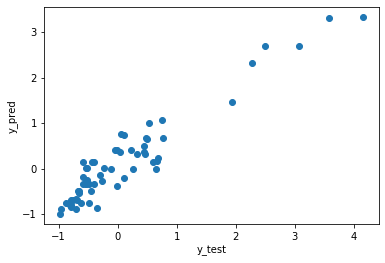

In [83]:
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

### predicted model accuracy ###

In [1]:
r_squ = r2_score(y_test,y_pred)
r_squ

NameError: name 'r2_score' is not defined

#### Business Goal ####
    You are required to model the price of cars with the available independent variables. It will be used by the management to  understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.
    
    
  **So linear equation for price can be given as: 𝑝𝑟𝑖𝑐𝑒 = -0.0748 + 0.3978 × carwidth + 0.5204 x enginesize + enginelocation_rear x 2.0419 + 0.7640 xenginetype_rotor + 1.1294 Xcar_company_bmw - 0.5879 x car_company_renault** 
    
    predicted model is performing well with 89% accuracy

In [9]:
letters = "abcdefghijklmnopqrstuvwxyz"
def Checker(string):

    string = string.replace(" ", "").lower()

    total = 0

    for l in letters:
        count = string.count(l)
        if count > 1:
            total += count

    if total > 0:
        print("Duplicates found.",total)
    else:
        print("No duplicates found.")


Checker("vivek")

Duplicates found. 2


In [14]:
# Solve the quadratic equation ax**2 + bx + c = 0

# import complex math module
import cmath

a = int(input('enter value for a:'))
b = int(input('enter value for b:'))
c = int(input('enter value for c:'))

# calculate the discriminant
d = (b**2) - (4*a*c)

# find two solutions
sol1 = (-b-cmath.sqrt(d))/(2*a)
sol2 = (-b+cmath.sqrt(d))/(2*a)

print('The solution are {0} and {1}'.format(sol1,sol2))

enter value for a:1
enter value for b:2
enter value for c:3
The solution are (-1-1.4142135623730951j) and (-1+1.4142135623730951j)


In [13]:
# import complex math module  
import cmath  
a = float(input('Enter a: '))  
b = float(input('Enter b: '))  
c = float(input('Enter c: '))  
  
# calculate the discriminant  
d = (b**2) - (4*a*c)  
  
# find two solutions  
sol1 = (-b-cmath.sqrt(d))/(2*a)  
sol2 = (-b+cmath.sqrt(d))/(2*a)  
print('The solution are {0} and {1}'.format(sol1,sol2))  

Enter a: 1
Enter b: 2
Enter c: 3
The solution are (-1-1.4142135623730951j) and (-1+1.4142135623730951j)
